# Convolution in CNNs


## Explanation of Convolution as a Mathematical Operation

Convolution is a mathematical operation that involves multiplying two functions to produce a third function, showing how one function modifies or affects the shape of another.

In CNNs, convolution involves sliding a filter (or kernel) over an input (e.g., an image) to produce a feature map, which represents the presence of specific features like edges or textures.

### Convolution Importantance in CNNs
- Convolution allows CNNs to automatically detect important features in images, such as edges, shapes, and patterns.
- It reduces the need for manual feature extraction and enables CNNs to recognize complex patterns in images as layers deepen.

### How Does Convolution Work?
- A filter (kernel) of size \( f \times f \) is applied to a section of the input image.
- Element-wise multiplication is performed between the filter and the corresponding part of the image.
- The products are summed to generate a single value in the output feature map.
- The filter then moves (slides) to the next position, repeating the process until the entire image is covered.


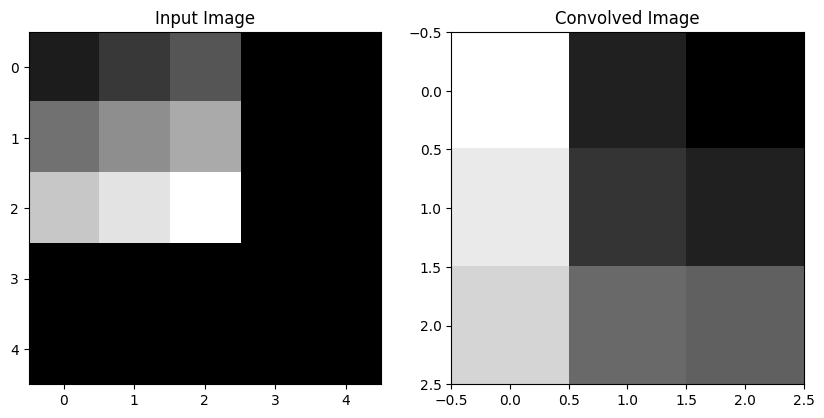

In [ ]:
# Example: Convolution Operation on a 5x5 Image with a 3x3 Filter
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Sample input image (5x5)
input_image = np.array([
    [1, 2, 3, 0, 0],
    [4, 5, 6, 0, 0],
    [7, 8, 9, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

# Sample filter (3x3)
filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Perform convolution using 'valid' padding
convolved_image = convolve2d(input_image, filter_kernel, mode='valid')

# Display the input and convolved image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(convolved_image, cmap='gray')
plt.show()


## Understanding the Purpose of Filters/Kernels in Detecting Features

### Explanation of Filters/Kernels
- Filters (or kernels) are small matrices (e.g., 3x3 or 5x5) used in convolution operations to extract features from input data.
- Different filters can detect different patterns, such as edges, textures, and shapes, by highlighting areas where specific features are present.
- Filters enable CNNs to recognize local patterns, such as the presence of vertical or horizontal edges.
- As the network learns, filters adapt to detect increasingly complex features, allowing deeper layers to understand more abstract concepts like objects or scenes.


## Concept of Stride and Its Impact on Output Dimensions

### Stride in CNNs
- Stride is the number of pixels by which the filter shifts across the input data during convolution.
- A stride of 1 means the filter shifts one pixel at a time, while a stride of 2 means it moves two pixels at each step.

- Stride affects the size of the output feature map. Larger strides result in smaller output dimensions.
- Using a larger stride can reduce the computational cost but may lead to a loss of fine details in the data.

### How Does Stride Impact the Output?
For an input image of size \(n \times n\), a filter of size \(f \times f\), and a stride \(s\):

\[
\text{Output size} = frac{input_image_size- Filter_size}//{stride} + 1
\]


In [ ]:
# Example: Visualizing Different Strides
def convolution_output_size(input_size, filter_size, stride):
    return (input_size - filter_size) // stride + 1

input_size = 5  # 5x5 input image
filter_size = 3  # 3x3 filter

print(f"Output size with stride 1: {convolution_output_size(input_size, filter_size, stride=1)}")
print(f"Output size with stride 2: {convolution_output_size(input_size, filter_size, stride=2)}")


Output size with stride 1: 3
Output size with stride 2: 2


## Role of Padding in Maintaining Spatial Dimensions

### Padding in CNNs
- Padding involves adding extra rows and columns around the input data before applying convolution.
- Common padding types include 'valid' (no padding) and 'same' (padding to preserve output size).

- Padding allows CNNs to maintain the spatial dimensions of the input, ensuring that important edge information is not lost.
- It is crucial when deeper layers are required, as it prevents excessive shrinking of the output dimensions.

### How Does Padding Affect Convolution?
- 'Same' padding results in an output feature map with the same dimensions as the input.
- 'Valid' padding results in a smaller output size since no extra padding is added.


In [ ]:
# Example: Effect of 'same' vs 'valid' padding on output size
from keras.layers import Conv2D
from keras.models import Sequential

model = Sequential()
# 'Same' padding maintains input dimensions
model.add(Conv2D(1, (3, 3), padding='same', input_shape=(28, 28, 1)))
print("Output shape with 'same' padding:", model.output_shape)

# 'Valid' padding reduces dimensions
model.add(Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
print("Output shape with 'valid' padding:", model.output_shape)


Output shape with 'same' padding: (None, 28, 28, 1)
Output shape with 'valid' padding: (None, 26, 26, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
